In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hassanmroueh","key":"d98ec107de7d8bd41df30841f68c2b4c"}'}

In [2]:
import os

# Create the .kaggle directory
os.makedirs('/root/.kaggle', exist_ok=True)

# Move your kaggle.json file to the .kaggle directory
!cp kaggle.json /root/.kaggle/

# Set the permissions for the kaggle.json file
!chmod 600 /root/.kaggle/kaggle.json

# Download the Food-101 dataset
!kaggle datasets download -d dansbecker/food-101 --unzip


Dataset URL: https://www.kaggle.com/datasets/dansbecker/food-101
License(s): other
100% 9.36G/9.38G [01:47<00:00, 140MB/s]
100% 9.38G/9.38G [01:47<00:00, 93.7MB/s]
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/kaggle/cli.py", line 63, in main
    out = args.func(**command_args)
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 1586, in dataset_download_cli
    self.dataset_download_files(dataset,
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 1520, in dataset_download_files
    z.extractall(effective_path)
  File "/usr/lib/python3.10/zipfile.py", line 1659, in extractall
    self._extract_member(zipinfo, path, pwd)
  File "/usr/lib/python3.10/zipfile.py", line 1714, in _extract_member
    shutil.copyfileobj(source, target)
  File "/usr/lib/python3.10/shutil.py", line 195, in copyfileobj
    buf = f

In [6]:
!unzip -q /content/food-101.zip -d /content/

[/content/food-101.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/food-101.zip or
        /content/food-101.zip.zip, and cannot find /content/food-101.zip.ZIP, period.


In [5]:
import os

# Path to the unzipped dataset directory
dataset_dir = '/content/food-101'

# Explore the dataset structure
for root, dirs, files in os.walk(dataset_dir):
    print(f"Root: {root}")
    print(f"Directories: {dirs}")
    print(f"Files: {files}")
    print("-" * 40)


In [7]:
import os

# Create the .kaggle directory
os.makedirs('/root/.kaggle', exist_ok=True)

# Move your kaggle.json file to the .kaggle directory
!cp kaggle.json /root/.kaggle/

# Set the permissions for the kaggle.json file
!chmod 600 /root/.kaggle/kaggle.json

# Re-download the Food-101 dataset
!kaggle datasets download -d dansbecker/food-101 -p /content/

# Verify if the file has been downloaded correctly
!ls /content/


Dataset URL: https://www.kaggle.com/datasets/dansbecker/food-101
License(s): other
... resuming from 0 bytes (10067059132 bytes left) ...
100% 9.37G/9.38G [01:48<00:00, 145MB/s]
100% 9.38G/9.38G [01:48<00:00, 92.4MB/s]
food-101.zip  kaggle.json  sample_data


In [8]:
# Unzip the dataset if it's downloaded correctly
!unzip -q /content/food-101.zip -d /content/



replace /content/food-101.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
A


In [9]:
import os

# Path to the unzipped dataset directory
dataset_dir = '/content/food-101'

# Explore the dataset structure
for root, dirs, files in os.walk(dataset_dir):
    print(f"Root: {root}")
    print(f"Directories: {dirs}")
    print(f"Files: {files}")
    print("-" * 40)


Root: /content/food-101
Directories: ['__MACOSX', 'food-101']
Files: []
----------------------------------------
Root: /content/food-101/__MACOSX
Directories: ['food-101']
Files: ['._food-101']
----------------------------------------
Root: /content/food-101/__MACOSX/food-101
Directories: ['images', 'meta']
Files: ['._meta', '._license_agreement.txt', '._.DS_Store', '._images', '._README.txt']
----------------------------------------
Root: /content/food-101/__MACOSX/food-101/images
Directories: ['guacamole', 'pork_chop', 'beet_salad', 'bibimbap', 'deviled_eggs', 'french_onion_soup', 'cannoli', 'chicken_wings', 'spaghetti_carbonara', 'chicken_quesadilla', 'pho', 'greek_salad', 'spaghetti_bolognese', 'poutine', 'ramen', 'chocolate_mousse', 'falafel', 'tacos', 'donuts', 'omelette', 'fried_calamari', 'grilled_cheese_sandwich', 'sashimi', 'french_toast', 'crab_cakes', 'foie_gras', 'spring_rolls', 'cheesecake', 'tuna_tartare', 'macarons', 'lobster_bisque', 'lasagna', 'ice_cream', 'paella', '

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
import os


In [11]:
base_dir = '/content/food-101/food-101/images'

# Define parameters for data loading
batch_size = 32
img_size = (150, 150)


In [12]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Using 20% of the data for validation
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Set as training data
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Set as validation data
)


Found 80800 images belonging to 101 classes.
Found 20200 images belonging to 101 classes.


In [13]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(101, activation='softmax')  # 101 classes for food categories
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 101)                 │          51,813 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,504,421 (13.37 MB)

 Trainable params: 3,504,421 (13.37 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2525/2525 ━━━━━━━━━━━━━━━━━━━━ 798s 312ms/step - accuracy: 0.0096 - loss: 4.6164 - val_accuracy: 0.0099 - val_loss: 4.6152
Epoch 2/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2525/2525 ━━━━━━━━━━━━━━━━━━━━ 1s 430us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 4.6187
Epoch 3/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 755s 298ms/step - accuracy: 0.0095 - loss: 4.6156 - val_accuracy: 0.0099 - val_loss: 4.6152
Epoch 4/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 0s 24us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 4.6169
Epoch 5/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 767s 285ms/step - accuracy: 0.0090 - loss: 4.6156 - val_accuracy: 0.0099 - val_loss: 4.6152
Epoch 6/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 0s 23us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 4.6161
Epoch 7/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 707s 279ms/step - accuracy: 0.0087 - loss: 4.6156 - val_accuracy: 0.0099 - val_loss: 4.6152
Epoch 8/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 0s 22us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 4.6150
Epoch 9/10
2525/2525 ━━━━━━━━━━━━━━━

In [15]:
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


632/632 ━━━━━━━━━━━━━━━━━━━━ 137s 217ms/step - accuracy: 0.0093 - loss: 4.6154
Validation Accuracy: 0.99%


In [16]:
model.save('food101_cnn_model.h5')


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import random


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


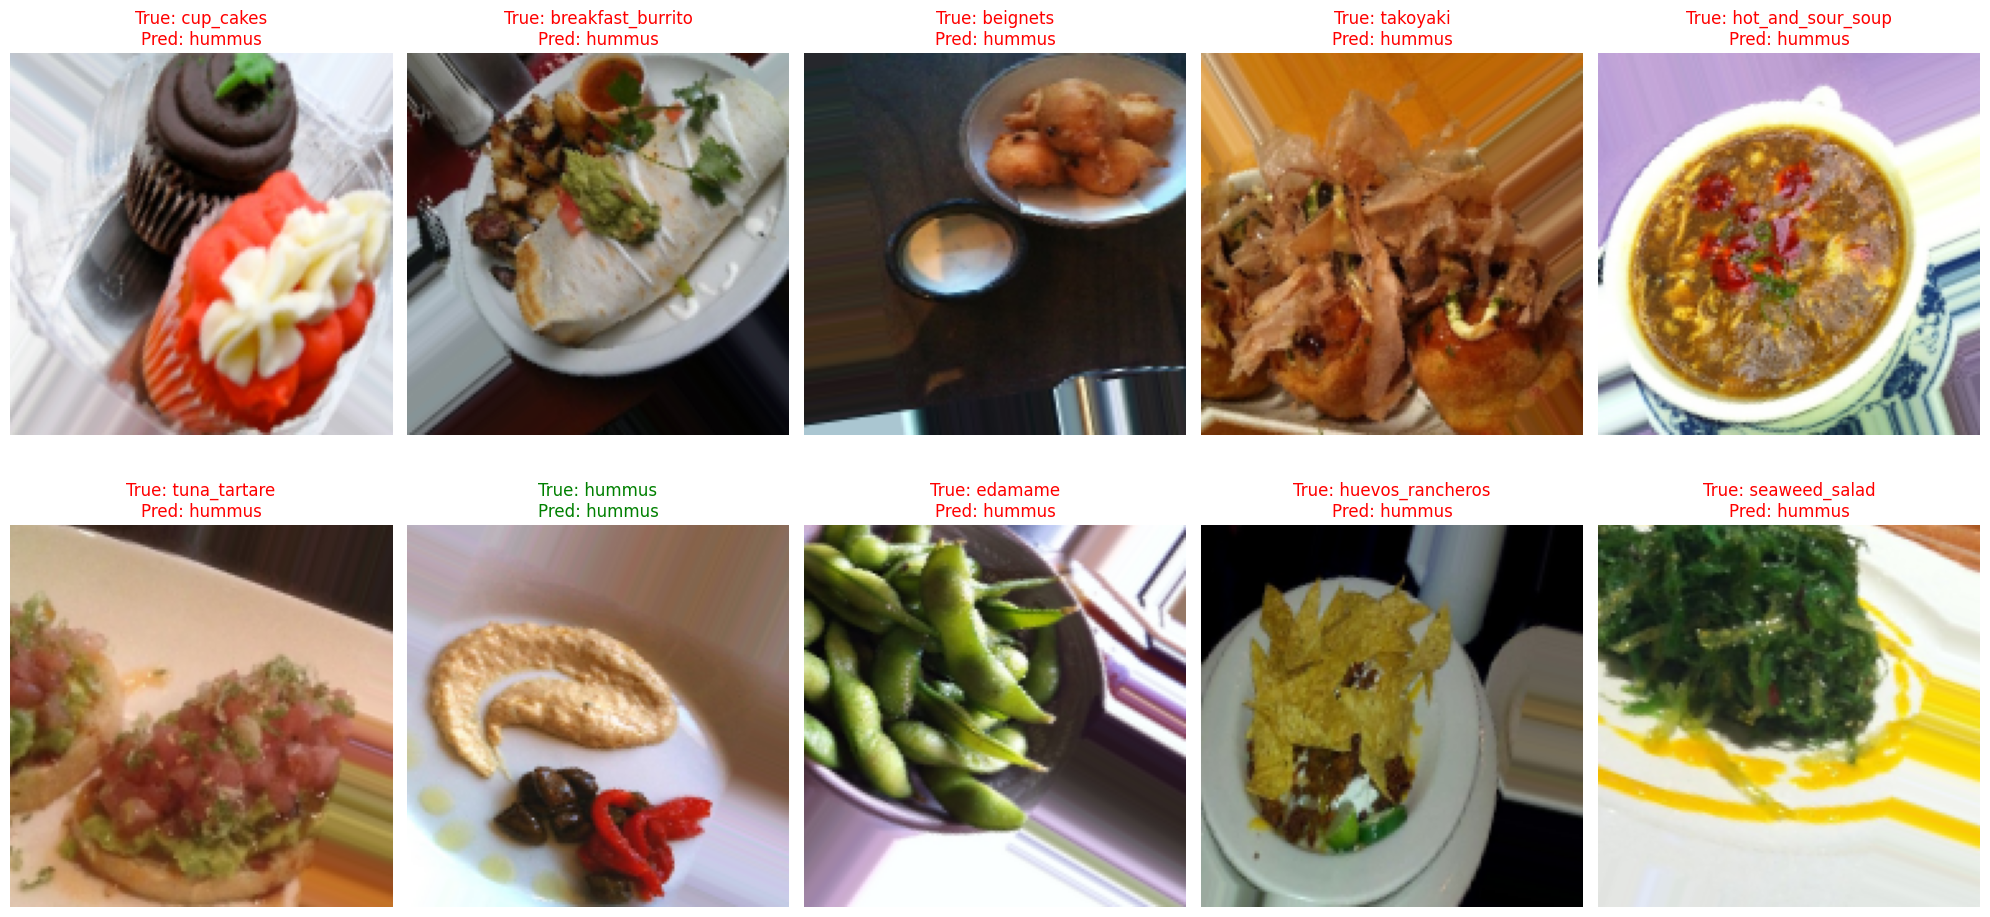

In [19]:
# Get the class indices and reverse them for decoding labels
class_indices = train_generator.class_indices
class_labels = {v: k for k, v in class_indices.items()}

# Function to plot predictions vs real labels
def plot_predictions_vs_real(model, validation_generator, class_labels):
    # Get 10 random indices from the validation data
    # Ensure indices are within the valid range
    indices = random.sample(range(len(validation_generator)), 10)  # Change here

    # Initialize a figure
    plt.figure(figsize=(20, 10))

    for i, idx in enumerate(indices):
        # Load the image and label from validation data
        img, label = validation_generator[idx]
        true_label = class_labels[np.argmax(label)]

        # Predict using the model
        prediction = model.predict(np.expand_dims(img[0], axis=0))
        predicted_label = class_labels[np.argmax(prediction)]

        # Plot the image
        plt.subplot(2, 5, i + 1)
        plt.imshow(img[0])
        plt.title(f"True: {true_label}\nPred: {predicted_label}", color=("green" if true_label == predicted_label else "red"))
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Plot the predictions vs real labels
plot_predictions_vs_real(model, validation_generator, class_labels)

632/632 ━━━━━━━━━━━━━━━━━━━━ 141s 222ms/step


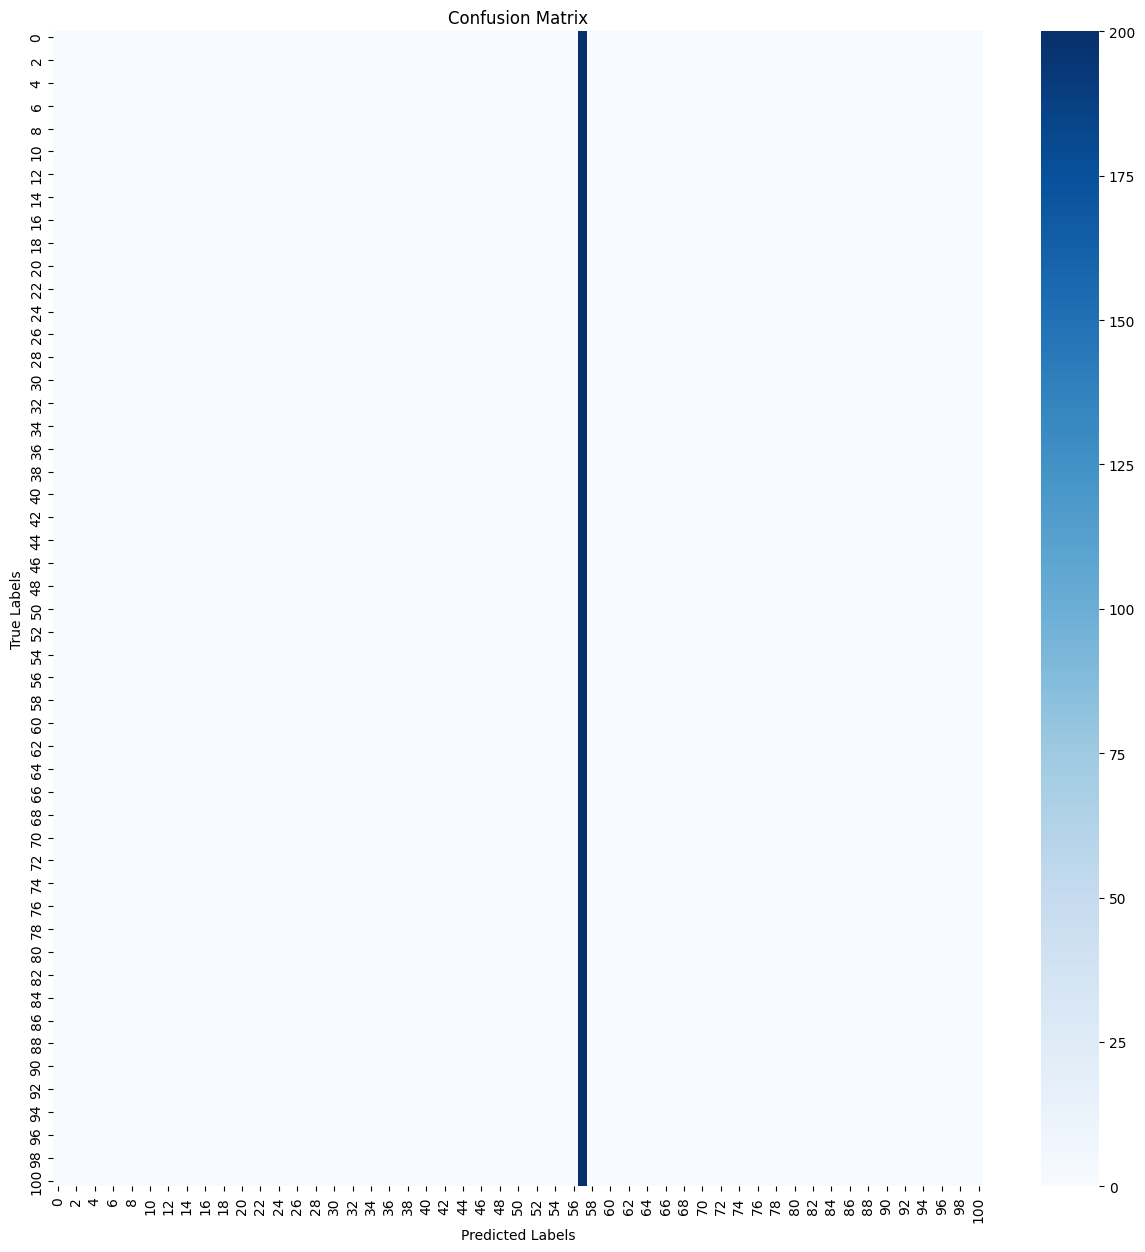

In [20]:
# prompt: generate a confusion matrix for this model

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions for the validation set
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels for the validation set
y_true = validation_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=False, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
